In [123]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import sklearn

In [124]:
# Ticker
#ticker = yf.Ticker('AAPL')

# Date range
start_date = '2025-01-1'
end_date = '2025-05-01'

# Download data
df = yf.download('EURUSD=X', start=start_date, end=end_date, interval='1d')

# Flatten data
#if isinstance(df.columns, pd.MultiIndex):
#    df.columns = ['_'.join(col).strip() for col in df.columns.values]

print(df.head())



[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2025-01-02  1.035186  1.037560  1.023185  1.035186        0
2025-01-03  1.026821  1.030535  1.026546  1.026821        0
2025-01-06  1.030535  1.043504  1.029633  1.030535        0
2025-01-07  1.038637  1.043623  1.035947  1.038637        0
2025-01-08  1.034554  1.035840  1.027675  1.034554        0


In [125]:
def strategy(df, window=1):
    df = df.copy()
    df['ret'] = np.log(df['Close'].pct_change() + 1)
    df['prior_n'] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
    df['strategy'] = df.ret * df.position.shift(1)
    return np.exp(df[['ret', 'strategy']].cumsum()).plot(figsize=(12, 8), title='Strategy vs. Buy and Hold', label='strategy')

<Axes: title={'center': 'Strategy vs. Buy and Hold'}, xlabel='Date'>

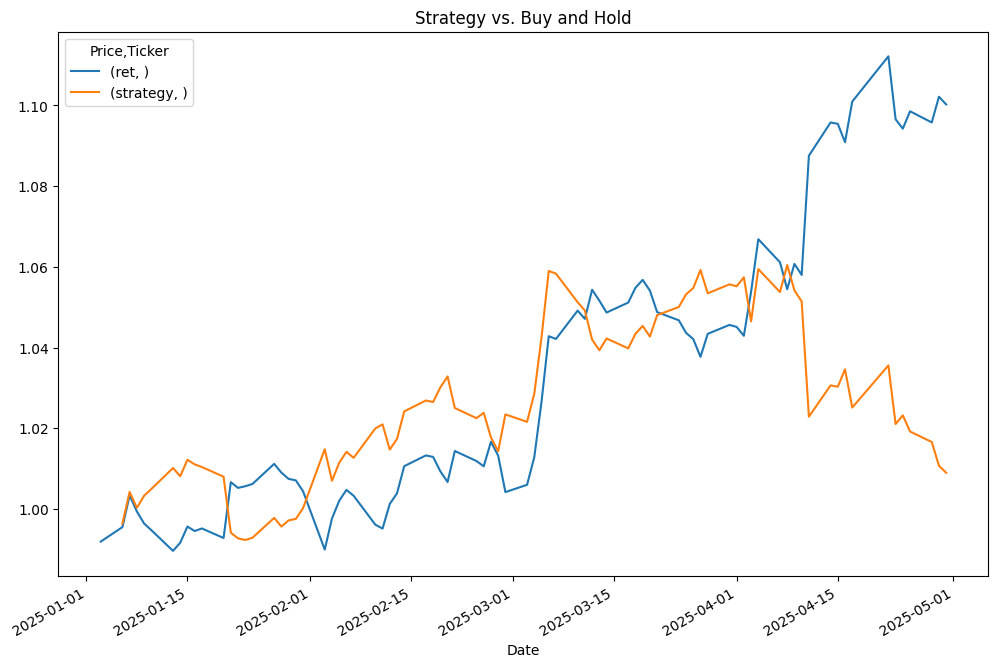

In [126]:
strategy(df)

In [127]:
#Intraday

df1 = yf.download('EURUSD=X', start=start_date, end=end_date, interval='1h')


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Strategy vs. Buy and Hold'}, xlabel='Datetime'>

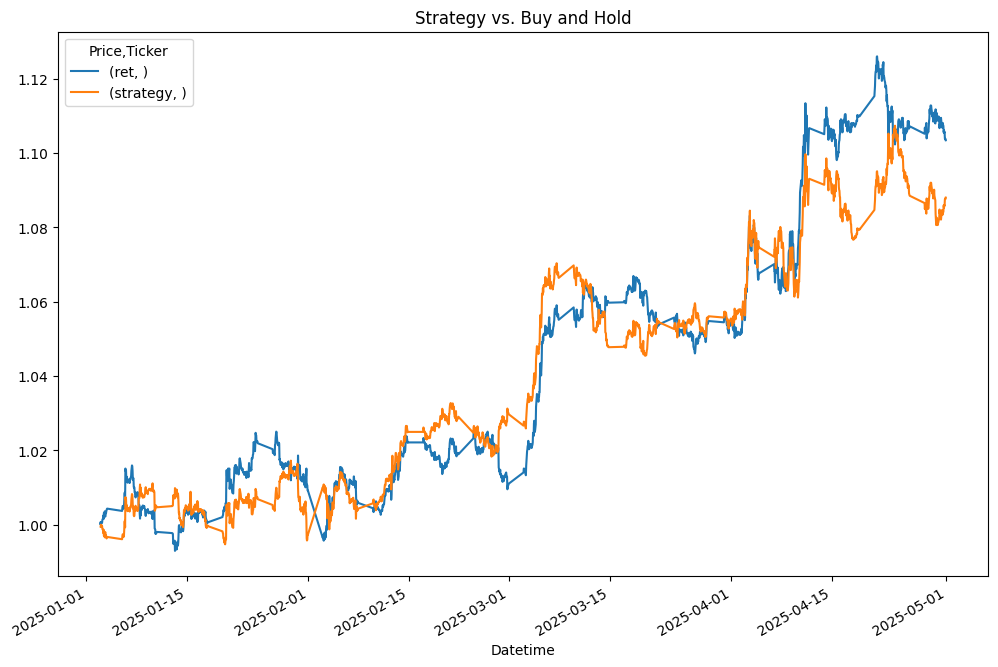

In [129]:
strategy(df1, 30)